In [12]:
# Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import duckdb

In [14]:
# Read in the dataset 
df = pd.read_csv('ds_challenge_v2_1_data.csv')
df.head(10)

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN
5,6,Strark,android web,Referral,1/18/16,1/18/16,1/22/16,Cadillac,DTS,2006.0,NaN
6,7,Strark,ios web,Paid,1/14/16,1/16/16,1/21/16,Toyota,Prius V,2014.0,1/23/16
7,8,Strark,ios web,Referral,1/26/16,2/5/16,NaN,NaN,NaN,NaN,NaN
8,9,Strark,NaN,Referral,1/5/16,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Berton,ios web,Paid,1/25/16,NaN,NaN,NaN,NaN,NaN,NaN


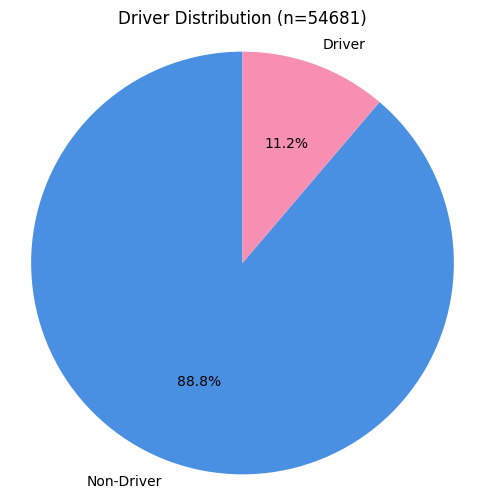

In [18]:
# Categorize who is a driver and whose not based on first completed
df["is_driver"] = df["first_completed_date"].isna().map({True: "Non-Driver", False: "Driver"})

# Count by category
driver_split = df['is_driver'].value_counts()

# Plot
plt.figure(figsize=(6,6))
colors = plt.get_cmap('Set3').colors
plt.pie(driver_split, labels=driver_split.index, autopct='%1.1f%%', startangle=90, colors = ['#4A90E2', '#F78FB3'] ,
    )
plt.title(f'Driver Distribution (n={len(df)})', fontsize=12)
plt.axis('equal')  # Equal aspect ratio makes it a circle
plt.show()

# Drivers vs. Non-Driver City Breakdown

We see that of the drivers who sign up to be Uber drivers, only a small percentage (~11%) of the drivers actually start driving.

We defined start driving as a driver who has driven at least 1 ride, which we used first_completed_date for.

We drilled down and separated drivers and non-drivers by city. The proportion of non-driver vs. driver per city is relatively equal to the general trend of driver vs. non-driver.

In [20]:
df.groupby(['city_name', 'is_driver']).size().reset_index(name='count')

,city_name,is_driver,count
0,Berton,Driver,2437
1,Berton,Non-Driver,17680
2,Strark,Driver,3239
3,Strark,Non-Driver,26318
4,Wrouver,Driver,461
5,Wrouver,Non-Driver,4546


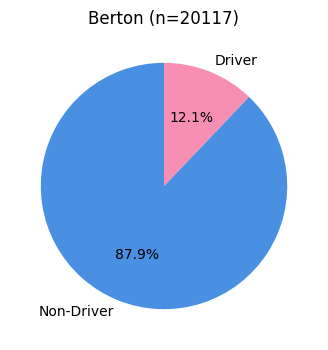

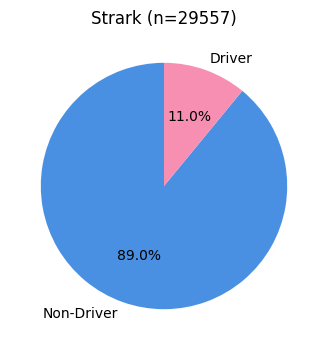

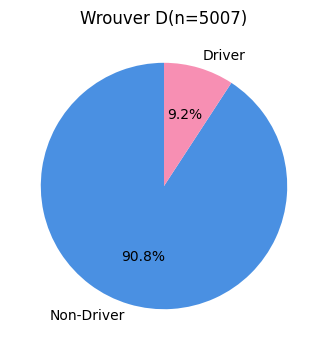

In [22]:
berton_data = df[df['city_name'] == 'Berton']['is_driver'].value_counts()
strark_data = df[df['city_name'] == 'Strark']['is_driver'].value_counts()
wrouver_data = df[df['city_name'] == 'Wrouver']['is_driver'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(berton_data, labels=berton_data.index, autopct='%1.1f%%', startangle=90, colors=['#4A90E2', '#F78FB3'])
plt.title(f'Berton (n={berton_data.sum()})', fontsize=12)
plt.show()

plt.figure(figsize=(4,4))
plt.pie(strark_data, labels=strark_data.index, autopct='%1.1f%%', startangle=90, colors=['#4A90E2', '#F78FB3'])
plt.title(f'Strark (n={strark_data.sum()})', fontsize=12)
plt.show()

plt.figure(figsize=(4,4))
plt.pie(wrouver_data, labels=wrouver_data.index, autopct='%1.1f%%', startangle=90, colors=['#4A90E2', '#F78FB3'])
plt.title(f'Wrouver D(n={wrouver_data.sum()})', fontsize=12)
plt.show()

After exploring different features, we tried to think of who would be more likely to be a driver and we thought a feature would be eagerness. The people who want the money and want to be on the road ASAP are more likely to be a driver. We know that drivers need to sign up, pass a background check, and add their vehicle information into the system. We hypothesize that the faster the drivers go through every requirement, the more likely they will become a driver.

In [6]:
df.columns

Index(['id', 'city_name', 'signup_os', 'signup_channel', 'signup_date',
       'bgc_date', 'vehicle_added_date', 'vehicle_make', 'vehicle_model',
       'vehicle_year', 'first_completed_date', 'is_driver'],
      dtype='object')

In [7]:
df.head(10)

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,is_driver
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN,Non-Driver
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN,Non-Driver
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN,Non-Driver
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16,Driver
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN,Non-Driver
5,6,Strark,android web,Referral,1/18/16,1/18/16,1/22/16,Cadillac,DTS,2006.0,NaN,Non-Driver
6,7,Strark,ios web,Paid,1/14/16,1/16/16,1/21/16,Toyota,Prius V,2014.0,1/23/16,Driver
7,8,Strark,ios web,Referral,1/26/16,2/5/16,NaN,NaN,NaN,NaN,NaN,Non-Driver
8,9,Strark,NaN,Referral,1/5/16,NaN,NaN,NaN,NaN,NaN,NaN,Non-Driver
9,10,Berton,ios web,Paid,1/25/16,NaN,NaN,NaN,NaN,NaN,NaN,Non-Driver


In [9]:
# No dependency on background check date vs. vehicle added date (either can be done at same time)
df[df["bgc_date"] == df["vehicle_added_date"]]

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,is_driver
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16,Driver
12,13,Strark,android web,Referral,1/12/16,1/12/16,1/12/16,Kia,Optima,2015.0,1/28/16,Driver
15,16,Strark,windows,Referral,1/15/16,1/17/16,1/17/16,Toyota,Prius V,2015.0,1/16/16,Driver
81,82,Strark,ios web,Referral,1/26/16,1/26/16,1/26/16,Toyota,Prius,2015.0,2/7/16,Driver
91,92,Strark,ios web,Organic,1/14/16,1/14/16,1/14/16,Lexus,CT,2013.0,1/17/16,Driver
...,...,...,...,...,...,...,...,...,...,...,...,...
54201,54202,Strark,mac,Paid,1/21/16,1/21/16,1/21/16,Nissan,Versa,2015.0,2/7/16,Driver
54210,54211,Strark,ios web,Organic,1/5/16,1/6/16,1/6/16,Kia,Soul,2014.0,1/14/16,Driver
54254,54255,Strark,mac,Referral,1/12/16,1/19/16,1/19/16,Ford,Focus,2003.0,2/2/16,Driver
54272,54273,Wrouver,other,Organic,1/22/16,1/22/16,1/22/16,Toyota,Prius+,2014.0,1/30/16,Driver


In [12]:
print(df.columns)
# Convert string data type to date data type
df['bgc_date'] = pd.to_datetime(df['bgc_date']).dt.date
df['signup_date'] = pd.to_datetime(df['signup_date']).dt.date
df['vehicle_added_date'] = pd.to_datetime(df['vehicle_added_date']).dt.date

# Feature Engineering - Adding date differences
df["bgc_signup_diff"] = df["bgc_date"] - df["signup_date"]
df["vehicle_signup_diff"] = df["vehicle_added_date"] - df["signup_date"]
df.head()

Index(['id', 'city_name', 'signup_os', 'signup_channel', 'signup_date',
       'bgc_date', 'vehicle_added_date', 'vehicle_make', 'vehicle_model',
       'vehicle_year', 'first_completed_date', 'is_driver', 'bgc_signup_diff',
       'vehicle_signup_diff'],
      dtype='object')


,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,is_driver,bgc_signup_diff,vehicle_signup_diff
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaT,NaN,NaN,NaN,NaN,Non-Driver,NaN,NaN
1,2,Strark,windows,Paid,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaN,Non-Driver,NaN,NaN
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT,NaN,NaN,NaN,NaN,Non-Driver,0:00:00,NaN
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2/3/16,Driver,"5 days, 0:00:00","5 days, 0:00:00"
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016.0,NaN,Non-Driver,"15 days, 0:00:00","16 days, 0:00:00"


# People who completed all the requirements to be eligible to drive

In [13]:
# Looking at group of individuals who completed all the requirements
df_completed_reqs = df[df["signup_date"].notna() & df["bgc_date"].notna() & df["vehicle_added_date"].notna()]
df_completed_reqs

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,is_driver,bgc_signup_diff,vehicle_signup_diff
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2/3/16,Driver,"5 days, 0:00:00","5 days, 0:00:00"
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016.0,NaN,Non-Driver,"15 days, 0:00:00","16 days, 0:00:00"
5,6,Strark,android web,Referral,2016-01-18,2016-01-18,2016-01-22,Cadillac,DTS,2006.0,NaN,Non-Driver,0:00:00,"4 days, 0:00:00"
6,7,Strark,ios web,Paid,2016-01-14,2016-01-16,2016-01-21,Toyota,Prius V,2014.0,1/23/16,Driver,"2 days, 0:00:00","7 days, 0:00:00"
10,11,Strark,ios web,Referral,2016-01-18,2016-02-09,2016-02-24,Kia,Optima,2015.0,NaN,Non-Driver,"22 days, 0:00:00","37 days, 0:00:00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54295,54296,Strark,android web,Referral,2016-01-24,2016-02-06,2016-02-29,Honda,Civic,2016.0,NaN,Non-Driver,"13 days, 0:00:00","36 days, 0:00:00"
54297,54298,Strark,android web,Organic,2016-01-14,2016-01-24,2016-02-14,Honda,Accord,2012.0,NaN,Non-Driver,"10 days, 0:00:00","31 days, 0:00:00"
54298,54299,Berton,mac,Referral,2016-01-21,2016-01-28,2016-02-09,Honda,CR-V,2015.0,NaN,Non-Driver,"7 days, 0:00:00","19 days, 0:00:00"
54303,54304,Strark,ios web,Referral,2016-01-02,2016-01-02,2016-01-09,Audi,A6,2011.0,1/16/16,Driver,0:00:00,"7 days, 0:00:00"


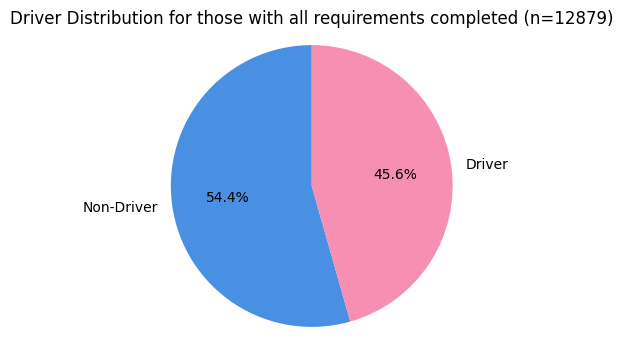

In [14]:
data = df_completed_reqs['is_driver'].value_counts()

# Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#4A90E2', '#F78FB3'])
plt.title(f'Driver Distribution for those with all requirements completed (n={data.sum()})', fontsize=12)
plt.axis('equal')
plt.show()

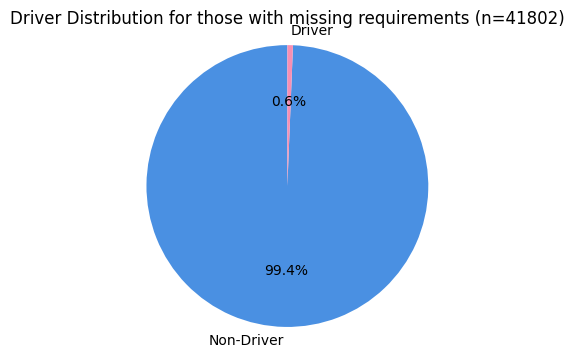

In [15]:
df_incomplete_reqs = df[df["signup_date"].isna() | df["bgc_date"].isna() | df["vehicle_added_date"].isna()]
df_incomplete_reqs

data = df_incomplete_reqs['is_driver'].value_counts()

# # Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#4A90E2', '#F78FB3'])
plt.title(f'Driver Distribution for those with missing requirements (n={data.sum()})', fontsize=12)
plt.axis('equal')
plt.show()

In [16]:
df[df["is_driver"] == "Driver"]

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,is_driver,bgc_signup_diff,vehicle_signup_diff
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2/3/16,Driver,"5 days, 0:00:00","5 days, 0:00:00"
6,7,Strark,ios web,Paid,2016-01-14,2016-01-16,2016-01-21,Toyota,Prius V,2014.0,1/23/16,Driver,"2 days, 0:00:00","7 days, 0:00:00"
12,13,Strark,android web,Referral,2016-01-12,2016-01-12,2016-01-12,Kia,Optima,2015.0,1/28/16,Driver,0:00:00,0:00:00
15,16,Strark,windows,Referral,2016-01-15,2016-01-17,2016-01-17,Toyota,Prius V,2015.0,1/16/16,Driver,"2 days, 0:00:00","2 days, 0:00:00"
43,44,Berton,android web,Referral,2016-01-29,2016-01-30,2016-02-01,Toyota,Corolla,2015.0,2/4/16,Driver,"1 day, 0:00:00","3 days, 0:00:00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54289,54290,Strark,ios web,Referral,2016-01-18,2016-01-18,2016-01-20,Honda,Civic,2016.0,1/20/16,Driver,0:00:00,"2 days, 0:00:00"
54290,54291,Berton,android web,Referral,2016-01-13,2016-01-15,2016-01-18,Honda,Civic,2013.0,1/18/16,Driver,"2 days, 0:00:00","5 days, 0:00:00"
54303,54304,Strark,ios web,Referral,2016-01-02,2016-01-02,2016-01-09,Audi,A6,2011.0,1/16/16,Driver,0:00:00,"7 days, 0:00:00"
54384,54385,Strark,windows,Referral,2016-01-30,2016-01-30,NaT,NaN,NaN,NaN,2/9/16,Driver,0:00:00,NaN


In [17]:
data = df_completed_reqs.groupby(["signup_channel", "is_driver"]).size()
display(data)

from scipy.stats import chi2_contingency
data = df_completed_reqs.groupby(["signup_channel", "is_driver"]).size().unstack()
chi2, p, dof, expected = chi2_contingency(data)

print(f"Chi-squared value: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Our p-value is < 0.05, so we reject the null and conclude evidence for the alternate hypothesis that the driver vs. nondriver proportion between different signup channels is significant")

signup_channel  is_driver 
Organic         Driver        1091
                Non-Driver    1724
Paid            Driver        1436
                Non-Driver    2157
Referral        Driver        3345
                Non-Driver    3126
dtype: int64

Chi-squared value: 195.93
p-value: 0.0000
Our p-value is < 0.05, so we reject the null and conclude evidence for the alternate hypothesis that the driver vs. nondriver proportion between different signup channels is significant


In [18]:
df_completed_reqs['referral_bool'] = df_completed_reqs['signup_channel'].apply(
    lambda x: 'Referral' if x == 'Referral' else 'Non-Referral'
)

/tmp/ipykernel_87/1991861032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completed_reqs['referral_bool'] = df_completed_reqs['signup_channel'].apply(


In [19]:
data = df_completed_reqs.groupby(['referral_bool', 'is_driver']).size().unstack()
chi2, p, dof, expected = chi2_contingency(data)
print(f"Chi-squared value: {chi2:.2f}")
print(f"p-value: {p:.4f}")

Chi-squared value: 194.51
p-value: 0.0000


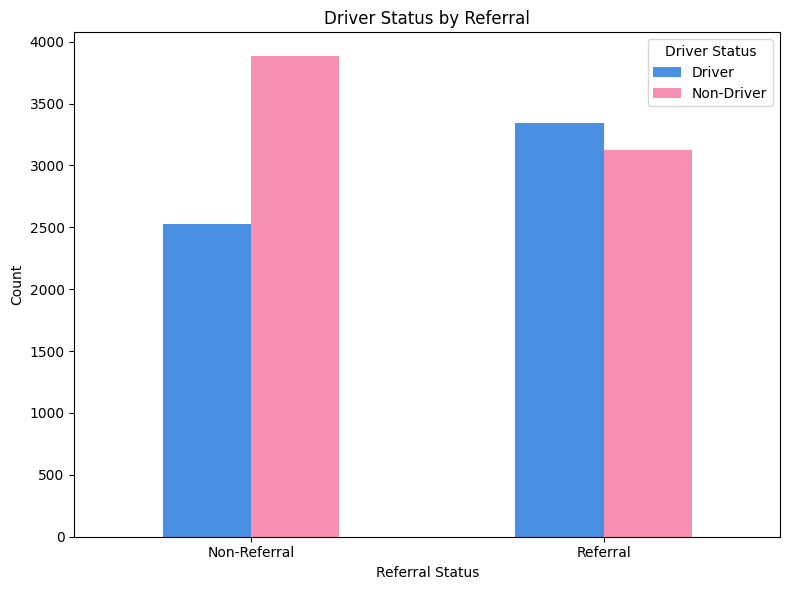

In [21]:

import pandas as pd
import matplotlib.pyplot as plt

# Get counts and convert to DataFrame
counts = df_completed_reqs.groupby(['referral_bool', 'is_driver']).size().unstack()

# Plot
counts.plot(kind='bar', stacked=False, color=['#4A90E2', '#F78FB3'], figsize=(8,6))
plt.title("Driver Status by Referral")
plt.xlabel("Referral Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title='Driver Status')
plt.tight_layout()
plt.show()


We can see that referrals are important and significant enough to include in our model.

So now the factors we should consider:

- Did the person complete all the logistical requirements to become a driver in the first place?

- Did the person use a referral to become a driver?

# Eligible drivers and their signup timings

In [24]:
data = df_completed_reqs[["id", "bgc_signup_diff", "vehicle_signup_diff", "is_driver"]].copy()
data["SameDay_bool"] = (
    (df_completed_reqs["bgc_signup_diff"] == pd.Timedelta(0)) &
    (df_completed_reqs["vehicle_signup_diff"] == pd.Timedelta(0))
)
data["SameWeek_bool"] = (
    (df_completed_reqs["bgc_signup_diff"] <= pd.Timedelta(7)) &
    (df_completed_reqs["vehicle_signup_diff"] <= pd.Timedelta(7))
)
data["Within2Week_bool"] = (
    (df_completed_reqs["bgc_signup_diff"] <= pd.Timedelta(14)) &
    (df_completed_reqs["vehicle_signup_diff"] <= pd.Timedelta(14))
)
data["Over2Week_bool"] = (
    (df_completed_reqs["bgc_signup_diff"] > pd.Timedelta(14)) |
    (df_completed_reqs["vehicle_signup_diff"] > pd.Timedelta(14))
)

labels = ["SameDay_bool", "SameWeek_bool", "Within2Week_bool", "Over2Week_bool"]

categories = {
    "Same Day": same_day,
    "Same Week": same_week,
    "Within 2 Weeks": within_2_weeks,
    "Over 2 Weeks": over_2_weeks
}

driver_counts = []
non_driver_counts = []

for label, mask in categories.items():
    driver_counts.append(data[mask & (data["is_driver"] == "Driver")].shape[0])
    non_driver_counts.append(data[mask & (data["is_driver"] == "Non-Driver")].shape[0])

labels = list(categories.keys())
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, driver_counts, width, label='Driver', color='#4A90E2')
plt.bar(x + width/2, non_driver_counts, width, label='Non-Driver', color='#F78FB3')

# Add counts on top
for i in range(len(x)):
    plt.text(x[i] - width/2, driver_counts[i] + 5, str(driver_counts[i]), ha='center')
    plt.text(x[i] + width/2, non_driver_counts[i] + 5, str(non_driver_counts[i]), ha='center')

plt.xticks(x, labels)
plt.ylabel('Number of Users')
plt.xlabel('Completion Time Category')
plt.title('Logistics Completion Timeline by Driver Status')
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'df_completed_reqs' is not defined

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create the 2x2 table
table = pd.DataFrame({
    'Driver': [735, 5137],
    'Non-Driver': [136, 6871]
}, index=['Same Day', 'Not Same Day'])

chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi-squared value: {chi2:.2f}")
print(f"p-value: {p:.4f}")


Chi-squared value: 565.04
p-value: 0.0000


In [34]:
df_completed_reqs["signup_os"].unique()

array(['android web', 'ios web', 'windows', nan, 'mac', 'other'],
      dtype=object)

In [1]:
def find_device(os):
    os = os.rstrip().lower()
    if pd.isna(os):
        return 'Unknown'
    os = os.lower()
    if 'ios' in os or 'android' in os:
        return 'Phone'
    elif 'windows' in os or 'mac' in os:
        return 'Computer'
    else:
        return 'Unknown'

df_completed_reqs['Device'] = df_completed_reqs['signup_os'].apply(find_device)
device_driver_counts = pd.crosstab(df_filtered['device_type'], df_filtered['is_driver'])
device_driver_counts.plot(kind='bar', stacked=False, color=['#F78FB3', '#4A90E2'])
plt.title('Driver vs Non-Driver by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.legend(title='Is Driver', labels=['Non-Driver', 'Driver'])
plt.xticks(rotation=0)
plt.tight_layout()

NameError: name 'df_completed_reqs' is not defined

In [124]:
df_phone = df_completed_reqs[df_completed_reqs['Device'] == "Phone"]
print(len(df_phone))

data = df_phone.groupby(["signup_os", "is_driver"]).size().reset_index(name='count')
data

7902


,signup_os,is_driver,count
0,android web,Driver,1403
1,android web,Non-Driver,1908
2,ios web,Driver,2118
3,ios web,Non-Driver,2473
